In [124]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#Read csv 
df = pd.read_csv('anime_data.csv')


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  3538 non-null   object 
 1   title                3538 non-null   object 
 2   type_tv              3538 non-null   object 
 3   alt_title_1          2150 non-null   object 
 4   alt_title_2          1161 non-null   object 
 5   rating               3538 non-null   float64
 6   description          3304 non-null   object 
 7   genres               3538 non-null   object 
 8   followers            3538 non-null   int64  
 9   status               3538 non-null   object 
 10  last_episode_number  3527 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 304.2+ KB


We have at least 3527 working links with episodes, pretty good results and a lenghty data list. 
Let's find duplicates in the primary key that is going to be URL. 

In [127]:
#Url column drop duplicates 
#print number of duplicates dropped
df['url'].drop_duplicates(inplace=True)
print('Number of duplicates dropped: ', df['url'].duplicated().sum())


Number of duplicates dropped:  1


In [128]:
#Let's check how many unique values are in type tv column 
df['type_tv'].value_counts()

type_tv
Anime       2734
OVA          506
Película     284
Especial      14
Name: count, dtype: int64

In [129]:
#Let's treat 'Especial' as 'OVA' as the same, replace with 'OVA'
df['type_tv'].replace('Especial', 'OVA', inplace=True)

c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

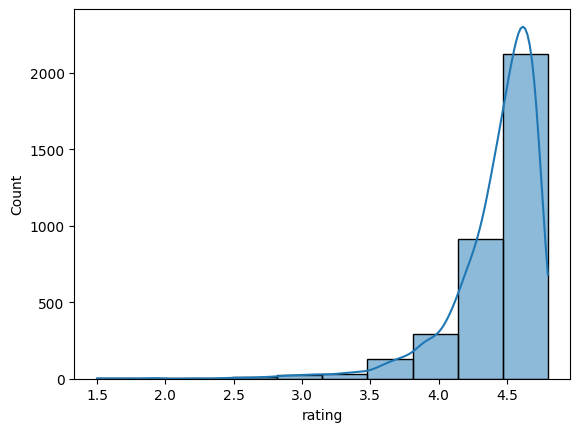

In [130]:
#Let's see the distribution of rating 
sns.histplot(df['rating'], bins=10, kde=True)

c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='followers', ylabel='Count'>

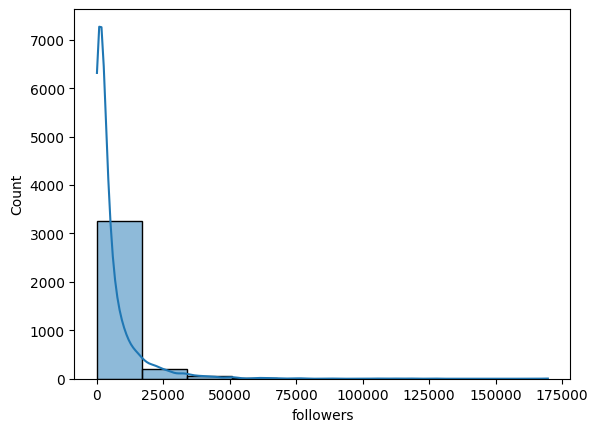

In [131]:
#We see that overall rating is positive for most shows, itr drops in 5 but most are between 4.5 to 5.0 
#Let's check the distribution of rating of popularity 
sns.histplot(df['followers'], bins=10, kde=True)

In [132]:
# let's check the min and max value of followers
df['followers'].min()
df['followers'].max()

print('The min value of followers is: ', df['followers'].min())
print('The max value of followers is: ', df['followers'].max())

#The value is 22, that's great because we don't have to deal with 0 values 


The min value of followers is:  22
The max value of followers is:  169626


In [133]:
#We are going to apply a z-score to the followers column as groups 
#To provent high popularity shows from skewing the data
df['followers'] = pd.qcut(df['followers'], q=10, labels=False)  # Divide into quartiles
df['z_score'] =  df.groupby('followers')['rating'].transform(lambda x: (x - x.mean()) / x.std())
df['adjusted_rating'] = df['rating'] + df['z_score']

In [134]:
#min and max in adjusted rating
df['adjusted_rating'].min()
df['adjusted_rating'].max()
#print the results
print('The min value of adjusted rating is: ', df['adjusted_rating'].min())
print('The max value of adjusted rating is: ', df['adjusted_rating'].max())


The min value of adjusted rating is:  -7.105025818013152
The max value of adjusted rating is:  6.194401584451894


In [135]:
#Normalization of rating
#Min-max normalization

# Original min and max from your data
old_min = df['adjusted_rating'].min()
old_max = df['adjusted_rating'].max()

# New min and max values you want to scale to
new_min = 1
new_max = 10

# Applying the normalization formula to rescale the 'adjusted_rating' values
df['normalized_rating'] = new_min + ((df['adjusted_rating'] - old_min) * (new_max - new_min) / (old_max - old_min))


c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='normalized_rating', ylabel='Count'>

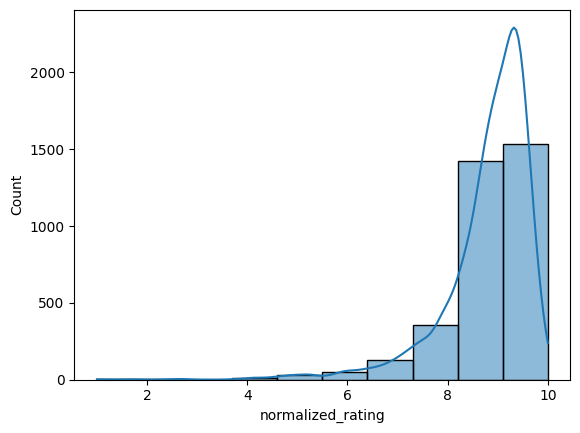

In [136]:
#Now let's check the distribution of normalized rating
sns.histplot(df['normalized_rating'], bins=10, kde=True)


c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

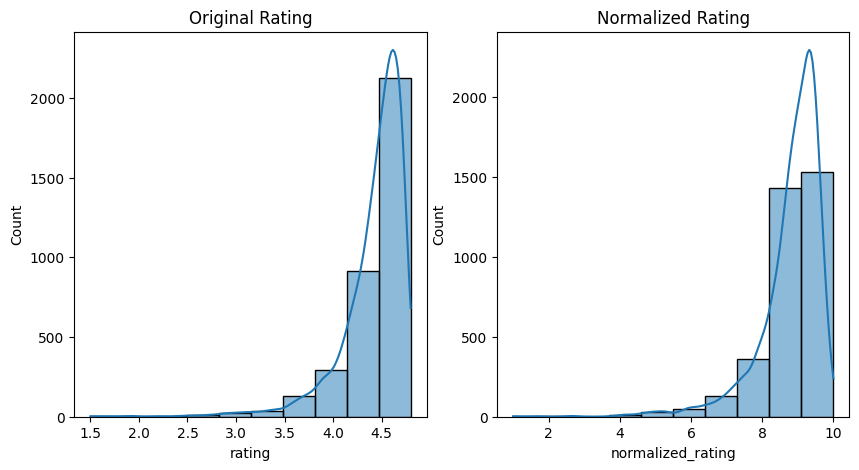

In [137]:
#Compare side by side the original rating and the normalized rating
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['rating'], bins=10, kde=True, ax=ax[0])
sns.histplot(df['normalized_rating'], bins=10, kde=True, ax=ax[1])
ax[0].set_title('Original Rating')
ax[1].set_title('Normalized Rating')
plt.show()


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  3538 non-null   object 
 1   title                3538 non-null   object 
 2   type_tv              3538 non-null   object 
 3   alt_title_1          2150 non-null   object 
 4   alt_title_2          1161 non-null   object 
 5   rating               3538 non-null   float64
 6   description          3304 non-null   object 
 7   genres               3538 non-null   object 
 8   followers            3538 non-null   int64  
 9   status               3538 non-null   object 
 10  last_episode_number  3527 non-null   float64
 11  z_score              3538 non-null   float64
 12  adjusted_rating      3538 non-null   float64
 13  normalized_rating    3538 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 387.1+ KB


In [139]:
#Let's drop adjusted rating and z-score columns, and let's round up to 1 decimal point
df.drop(['adjusted_rating', 'z_score', 'rating'], axis=1, inplace=True)
df['normalized_rating'] = df['normalized_rating'].round(1)


In [140]:
#Lets check those rows where last_episode_number is not a number
df[df['last_episode_number'].isna()]

,url,title,type_tv,alt_title_1,alt_title_2,description,genres,followers,status,last_episode_number,normalized_rating
34,https://www3.animeflv.net/anime/kyousogiga-tv,Kyousogiga (TV),Anime,NaN,NaN,"En esta versión paralela de Kyoto, un sitio ll...","['Acción', 'Fantasía', 'Sobrenatural']",3,Finalizado,NaN,9.6
391,https://www3.animeflv.net/anime/owari-no-seraph,Owari no Seraph,Anime,NaN,NaN,"Un día, un misterioso virus apareció en la Tie...","['Acción', 'Drama', 'Shounen', 'Sobrenatural',...",9,Finalizado,NaN,8.8
457,https://www3.animeflv.net/anime/aldnoah-zero,Aldnoah.Zero,Anime,NaN,NaN,En 1972 se descubría un portal espacial en la ...,"['Acción', 'Ciencia Ficción', 'Mecha']",6,Finalizado,NaN,9.3
556,https://www3.animeflv.net/anime/mahou-shoujo-n...,Mahou Shoujo? Naria☆Girls,Anime,NaN,NaN,La historia gira en torno a unas chicas llamad...,['Magia'],1,Proximamente,NaN,8.2
752,https://www3.animeflv.net/anime/ragnastrike-an...,Ragnastrike Angels,Anime,NaN,NaN,La serie trata sobre chicas de un tamaño de 38...,['Acción'],2,Proximamente,NaN,7.0
1264,https://www3.animeflv.net/anime/shadowverse-tv,Shadowverse (TV)\t,Anime,シャドウバース,NaN,"La historia se centra en Hiiro Ryugasaki, un e...","['Fantasía', 'Juegos']",5,Finalizado,NaN,6.1
1869,https://www3.animeflv.net/anime/nurarihyon-no-...,Nurarihyon no Mago: Sennen Makyo,Anime,ぬらりひょんの孫 千年魔京,NaN,Segunda Temporada de Nurarihyion no Mago. Riku...,"['Acción', 'Demonios', 'Shounen', 'Sobrenatural']",3,Finalizado,NaN,9.1
2103,https://www3.animeflv.net/anime/ame-iro-cocoa-...,Ame-iro Cocoa in Hawaii,Anime,NaN,NaN,¡¿El Cafe Rainy Color se está expandiendo a Ha...,"['Comedia', 'Recuentos de la vida']",1,Proximamente,NaN,8.4
2744,https://www3.animeflv.net/anime/kamisama-minar...,Kamisama Minarai: Himitsu no Cocotama,Anime,NaN,NaN,Los “Cocotama” son unos pequeños dioses nacido...,"['Fantasía', 'Infantil', 'Magia']",1,Proximamente,NaN,6.9
2763,https://www3.animeflv.net/anime/hakuouki-otogi...,Hakuouki: Otogisoushi,Anime,NaN,NaN,NaN,"['Fantasía', 'Historico', 'Josei', 'Samurai']",1,Proximamente,NaN,8.4


In [141]:
# Create a dictionary to store the index-value pairs
index_values = {
    34: 13,
    391: 12,
    457: 12,
    556: 12,
    752: 12,
    1264: 48,
    1869: 24,
    2103: 12,
    2744: 26,
    2763: 12,
    2994: 25
}

# Update the 'last_episode_number' values using the dictionary
df.loc[df.index.isin(index_values.keys()), 'last_episode_number'] = df.index.to_series().map(index_values)

In [142]:
#Let's check index 2994 
df.loc[2994]


url                    https://www3.animeflv.net/anime/kuroko-no-bask...
title                                                 Kuroko no Basket 3
type_tv                                                            Anime
alt_title_1                                                          NaN
alt_title_2                                                          NaN
description            Tercera temporada de Kuroko no Basuke.\r\nEl c...
genres                   ['Comedia', 'Deportes', 'Escolares', 'Shounen']
followers                                                              7
status                                                        Finalizado
last_episode_number                                                 25.0
normalized_rating                                                    9.5
Name: 2994, dtype: object

In [143]:
#Let's turn last_episode_number into an integer
df['last_episode_number'] = df['last_episode_number'].astype(int)


In [144]:
#Status unique values
df['status'].unique()


array(['En emision', 'Finalizado', 'Proximamente'], dtype=object)

In [145]:
#Replace 'Proximamente' with 'Finalizado' 
df['status'].replace('Proximamente', 'Finalizado', inplace=True)



In [146]:
#let's print 10 rows of the column genres just that column and as print data 
print(df['genres'].head(10).to_string(index=False))


                                       ['Romance']
                           ['Comedia', 'Deportes']
               ['Comedia', 'Escolares', 'Romance']
['Comedia', 'Ecchi', 'Escolares', 'Romance', 'S...
       ['Recuentos de la vida', 'Romance', 'Yuri']
                             ['Ecchi', 'Fantasía']
        ['Demonios', 'Magia', 'Romance', 'Shoujo']
   ['Acción', 'Shounen', 'Sobrenatural', 'Terror']
['Acción', 'Ciencia Ficción', 'Fantasía', 'Magi...
             ['Misterio', 'Psicológico', 'Terror']


In [147]:
import ast

# Convert genre column strings that are list representations to actual lists
df['genres'] = df['genres'].apply(ast.literal_eval)

# Get a list of all unique genres
all_genres = set(genre for sublist in df['genres'] for genre in sublist)

# Create new columns for each genre and encode with binary values
for genre in all_genres:
    df[genre] = df['genres'].apply(lambda x: int(genre in x))

# Drop the original 'genres' column
df.drop('genres', axis=1, inplace=True)


In [148]:
# Regular expression for matching Japanese characters
japanese_regex = '[\u3000-\u303F\u3040-\u309F\u30A0-\u30FF\uFF00-\uFFEF\u4E00-\u9FAF\u3400-\u4DBF]'

# Use the regex to identify rows with Japanese characters in either column
mask1 = df['alt_title_1'].str.contains(japanese_regex, na=False)
mask2 = df['alt_title_2'].str.contains(japanese_regex, na=False)

# Replace the values in the 'alt_title_1' and 'alt_title_2' columns with NaN if they contain Japanese characters
df.loc[mask1, 'alt_title_1'] = np.nan
df.loc[mask2, 'alt_title_2'] = np.nan

In [149]:
#Replace alt_title_1 with alt_title_2 if alt_title_1 is NaN
df['alt_title_1'].fillna(df['alt_title_2'], inplace=True)
#Drop alt_title_2
df.drop('alt_title_2', axis=1, inplace=True)
#Rename alt_title_1 to alt_title
df.rename(columns={'alt_title_1': 'alt_title'}, inplace=True)


In [150]:
#After column 8 I have all the genres, let's check the columns as sums to count how many genres are in each show
genres = df.iloc[:, 9:].sum(axis=0) 
genres.sort_values(ascending=False, inplace=True)
genres  # Print the results

Comedia                 1581
Acción                  1264
Fantasía                 950
Romance                  797
Escolares                782
Drama                    720
Shounen                  675
Sobrenatural             617
Ciencia Ficción          564
Recuentos de la vida     559
Aventuras                544
Ecchi                    373
Magia                    340
Seinen                   335
Misterio                 255
Harem                    236
Superpoderes             225
Shoujo                   205
Historico                201
Deportes                 199
Mecha                    194
Música                   175
Militar                  157
Psicológico              143
Terror                   120
Demonios                 111
Parodia                  106
Artes Marciales           91
Juegos                    87
Espacial                  80
Vampiros                  67
Suspenso                  65
Samurai                   60
Yuri                      48
Josei         

In [151]:
# Define the priority order of genres (ensure this list includes all genres present in your DataFrame)
genre_priority = ['Comedia', 'Acción', 'Fantasía', 'Romance', 'Escolares', 'Drama', 'Shounen', 'Sobrenatural', 'Ciencia Ficción',
                  'Recuentos de la vida', 'Aventuras', 'Ecchi', 'Magia', 'Seinen', 'Misterio', 'Harem', 'Superpoderes', 'Shoujo',
                  'Historico', 'Deportes', 'Mecha', 'Música', 'Militar', 'Psicológico', 'Terror', 'Demonios', 'Parodia', 'Artes Marciales',
                  'Juegos', 'Espacial', 'Vampiros', 'Suspenso', 'Samurai', 'Yuri', 'Josei', 'Yaoi', 'Infantil', 'Policía',
                  'Carreras', 'Demencia']

# Creating the new columns to hold the top 3 genres
df['genre_1'], df['genre_2'], df['genre_3'] = [None, None, None]

# Iterating over each row
for index, row in df.iterrows():
    # Keep track of genres and their priority for the current row
    genres_with_priority = []

    # Check all genre columns and their values for the show
    for genre in genre_priority:
        if row[genre] == 1:
            genres_with_priority.append(genre)

    # Sort the picked genres by their overall priority and keep top three
    top_genres = sorted(genres_with_priority, key=lambda x: genre_priority.index(x))[:3]

    # Assign top three genres to dedicated columns and turn rest into 0s
    for i, genre_col_name in enumerate(['genre_1', 'genre_2', 'genre_3']):
        # Assign genre name if within top 3 otherwise NaN
        df.at[index, genre_col_name] = top_genres[i] if i < len(top_genres) else None

# Now drop the original genre columns
df.drop(genre_priority, axis=1, inplace=True)

# Now you have three new columns for the most popular genres for each show, and the original genre columns are removed.
print(df[['genre_1', 'genre_2', 'genre_3']])




       genre_1               genre_2      genre_3
0      Romance                  None         None
1      Comedia              Deportes         None
2      Comedia               Romance    Escolares
3      Comedia               Romance    Escolares
4      Romance  Recuentos de la vida         Yuri
...        ...                   ...          ...
3533   Shounen              Misterio    Historico
3534   Romance             Escolares        Drama
3535  Fantasía                 Drama  Psicológico
3536   Comedia             Escolares       Seinen
3537   Comedia               Romance        Drama

[3538 rows x 3 columns]


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  3538 non-null   object 
 1   title                3538 non-null   object 
 2   type_tv              3538 non-null   object 
 3   alt_title            1268 non-null   object 
 4   description          3304 non-null   object 
 5   followers            3538 non-null   int64  
 6   status               3538 non-null   object 
 7   last_episode_number  3538 non-null   int32  
 8   normalized_rating    3538 non-null   float64
 9   genre_1              3528 non-null   object 
 10  genre_2              3284 non-null   object 
 11  genre_3              2749 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 318.0+ KB


In [153]:
#We are almost done let's replace followers with popularity
df.rename(columns={'followers': 'popularity'}, inplace=True)
#Turn a new csv file
df.to_csv('anime_data_cleaned.csv', index=False)


In [161]:
#Print 10 descriptions values complete text 
df['description'].head(10)


0    Yuki Itose es una típica estudiante que lidia ...
1                                                  NaN
2    La historia comienza cuando Nozomu Futami, el ...
3    Okusama ga Seito Kaichou! es una comedia eróti...
4    Fumi y Akira eran íntimas amigas de infancia h...
5    El contexto de la franquicia gira en torno a s...
6    Usagi Tsukino es una estudiante de segundo de ...
7    Michiru Kita es una chica que posee ojos de Sh...
8    Nos situamos en el año 2086, diez años después...
9    Keiji Takeda está esperando a su novia, Touka ...
Name: description, dtype: object